#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.

---
#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 

# Git clone and install DeOldify

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [2]:
cd DeOldify

/content/DeOldify


# Setup

In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [4]:
!pip install -r colab_requirements.txt

In [5]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [6]:
!pwd

/content/DeOldify


In [7]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2022-03-11 14:43:15--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  26.6MB/s    in 9.8s    

2022-03-11 14:43:25 (24.9 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [8]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2022-03-11 14:43:50--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2022-03-11 14:43:50 (48.3 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [9]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

# Colorize

In [10]:
render_factor = 35  # min: 7, max: 40}
watermarked = True 

In [33]:
source_url = 'https://paranahaciaelmundo.com/wp-content/uploads/2020/05/pagina_004-001.jpg'
source_path = '/content/DeOldify/test_images/paranahaciaelmundo_Calle_SanMartin_Cervantes.jpg'
result_path = None

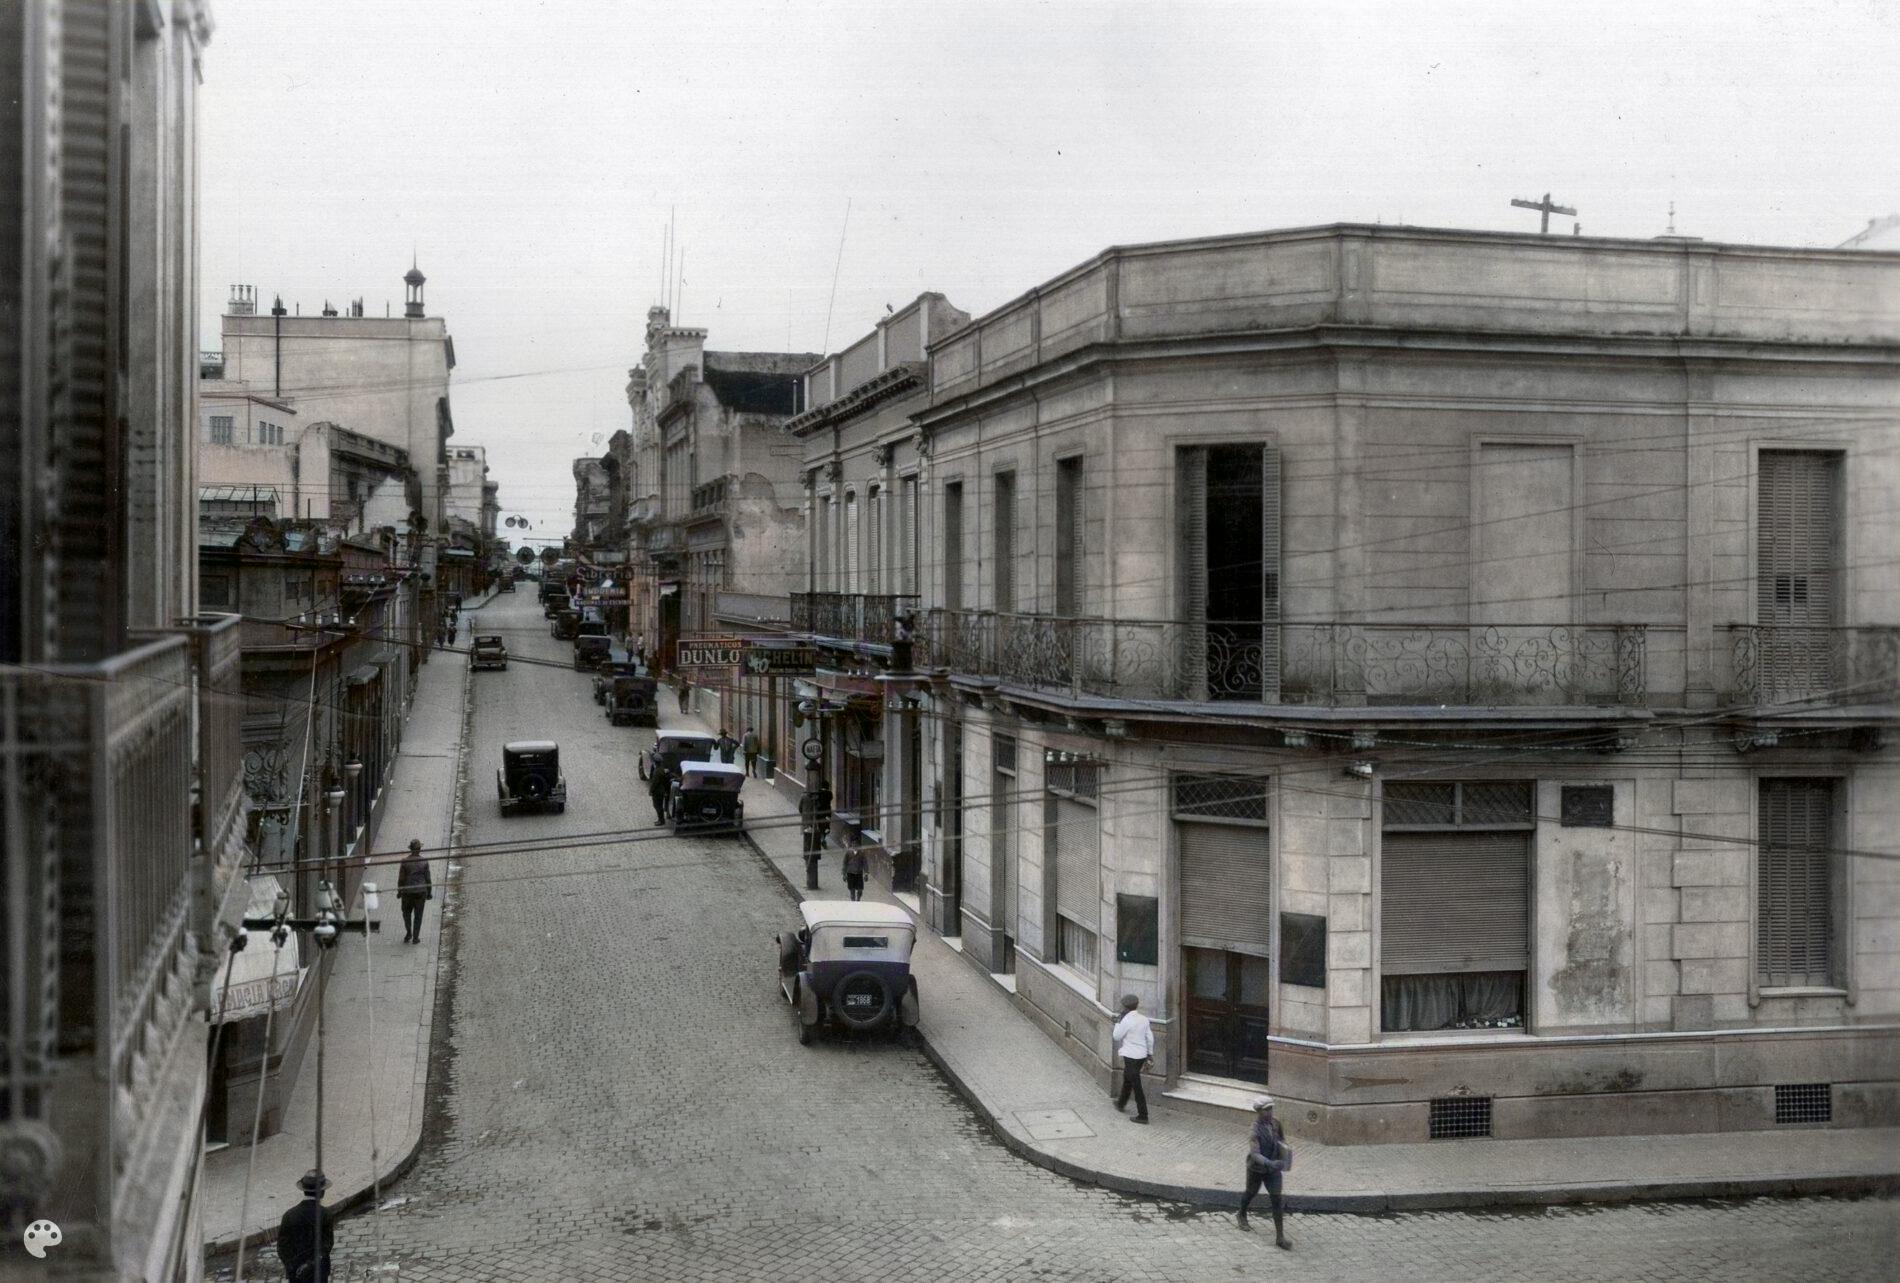

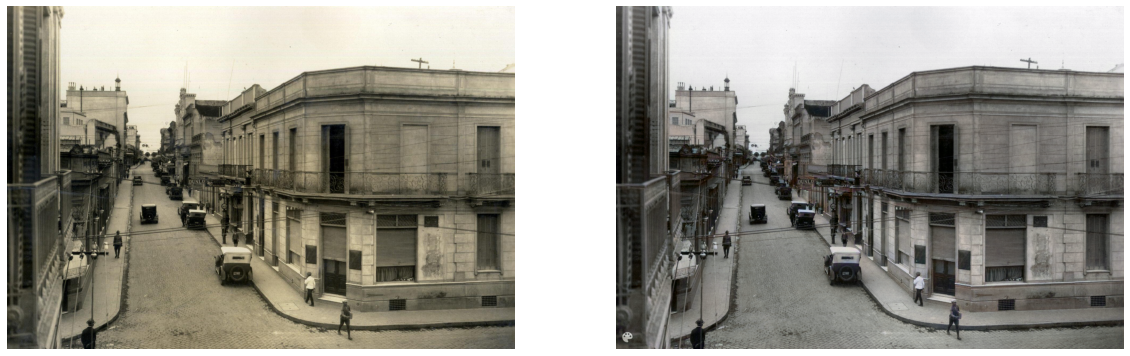

In [34]:
if source_url is not None:
  result_path = colorizer.plot_transformed_image_from_url(url=source_url, path=source_path, render_factor=render_factor, compare=True, watermarked=watermarked)
else:
  result_path = colorizer.plot_transformed_image(path=source_path, render_factor=render_factor, compare=True, watermarked=watermarked)

show_image_in_notebook(result_path)